We shall work with a bank marketing dataset
The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution
Additional Information

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 



Import the pandas and the matplotlib library in this module

In [43]:
import pandas as pd # data analysis
import matplotlib.pyplot as plt # visualization or EDA (Exploratory Data Analysis)
import seaborn as sns # Visualization
import numpy as np # numerical analysis

# for Q-Q plots
import scipy.stats as stats # Scientific Python - statistics 

In [2]:
data = pd.read_csv('bank.csv',sep=';')# default sepearator is ,

data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


**Continuous Variable**

In [3]:
# Let's look at the values of the variable balance and denotes average yearly balance.
# This is the amount the bank maintains the balance for a year.

# This variable is continuous: it can take, in principle,
# any value.

data['balance'].unique()

array([ 1787,  4789,  1350, ...,  -333, -3313,  1137], dtype=int64)

Text(0, 0.5, 'Balance count')

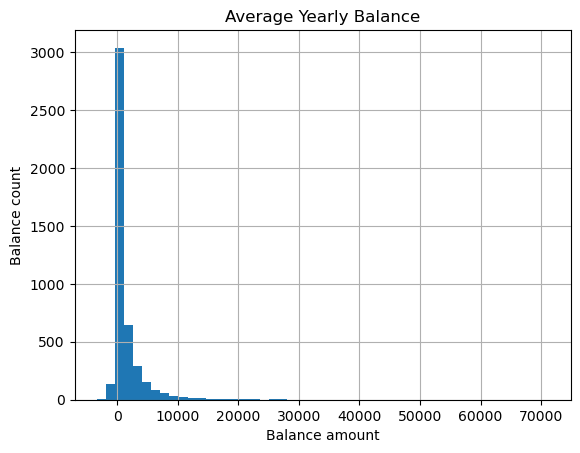

In [4]:
# Let's make a histogram to get familiar with the
# variable distribution.

fig = data['balance'].hist(bins=50)

fig.set_title('Average Yearly Balance')
fig.set_xlabel('Balance amount')
fig.set_ylabel('Balance count')- 

In [6]:
# Let's check the variable duration,
# last contact duration, in seconds (numeric). 
# This variable is also continuous: it can take, in principle,
# any value within the range.

data['duration'].unique()

Text(0, 0.5, 'Call duration in seconds')

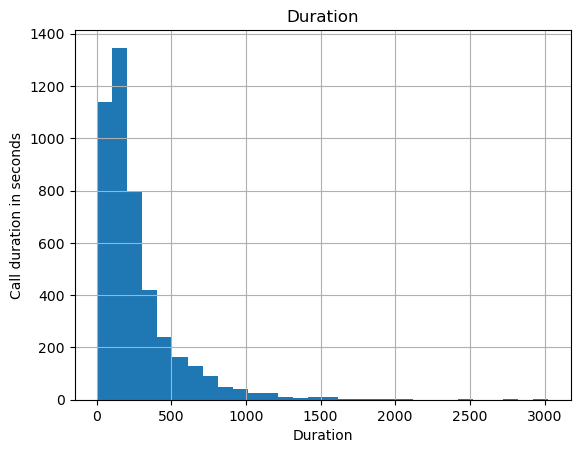

In [7]:
# Let's make a histogram to get familiar with the
# variable distribution.

fig = data['duration'].hist(bins=30)

fig.set_title('Duration')
fig.set_xlabel('Duration')
fig.set_ylabel('Call duration in seconds')

**Discrete variable - Age**

In [8]:
#Let's inspect the values of the variable.

# This is a discrete variable.

data['age'].dropna().unique()

array([30, 33, 35, 59, 36, 39, 41, 43, 20, 31, 40, 56, 37, 25, 38, 42, 44,
       26, 55, 67, 53, 68, 32, 49, 78, 23, 52, 34, 61, 45, 48, 57, 54, 63,
       51, 29, 50, 27, 60, 28, 21, 58, 22, 46, 24, 77, 75, 47, 70, 65, 64,
       62, 66, 19, 81, 83, 80, 71, 72, 69, 79, 73, 86, 74, 76, 87, 84],
      dtype=int64)

Text(0, 0.5, 'Number of Customers')

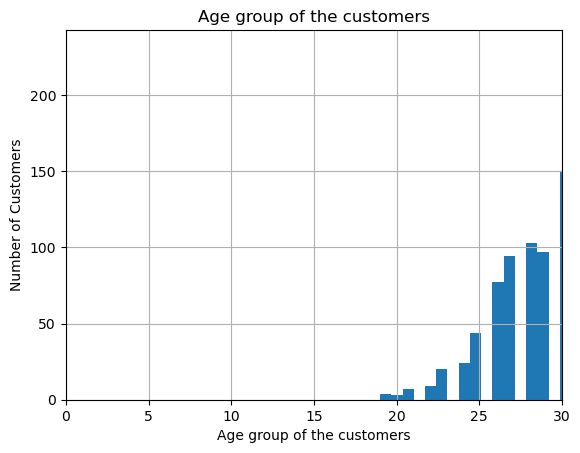

In [9]:
# Let's make an histogram to get familiar with the
# variable distribution.

fig = data['age'].hist(bins=100)

# For better visualisation, I display a specific
# value range in the x-axis.
fig.set_xlim(0, 30)

# Title and axis labels.
fig.set_title('Age group of the customers')
fig.set_xlabel('Age group of the customers')
fig.set_ylabel('Number of Customers')

**Binary variable**

In [11]:
# A binary variable, can take 2 values. For example in
# the variable "default", either the loan is 
# defaulted (1) or not (0).
data['default'].unique()

array(['no', 'yes'], dtype=object)

In [14]:
data['default'] = data.default.map(dict(yes=1, no=0))

In [15]:
data['default'].unique()


array([0, 1], dtype=int64)

In [17]:
data['default'].value_counts()

0    4445
1      76
Name: default, dtype: int64

Text(0, 0.5, 'Number of Records')

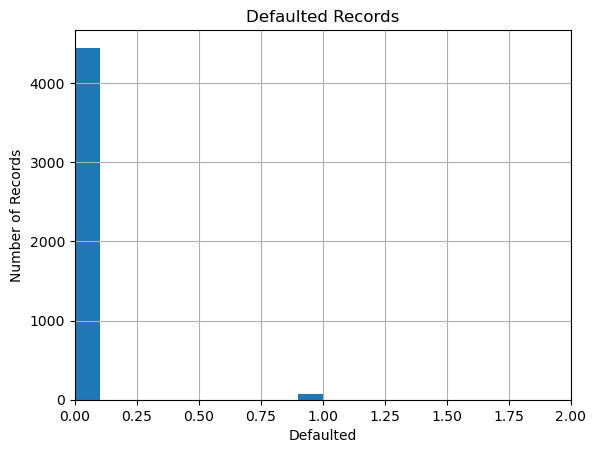

In [16]:
# Let's make a histogram, although histograms for
# binary variables do not make a lot of sense.

fig = data['default'].hist()
fig.set_xlim(0, 2)
fig.set_title('Defaulted Records')
fig.set_xlabel('Defaulted')
fig.set_ylabel('Number of Records')

**Categorical Variables**
Categorical variables are classified into group of categories also called as labels.
 - Categorical Variables can be classified into categories
   - Ordinal Variables : Categroeies are ordered
     - Size of Shoes (Small, Medium, Large)
     - Rating (1,2,3,4)
   - Nominal Variables : No order for the labels - Nominal variables
     - Profession : Doctor, Engineer, Teacher 
     - Car : Maruti Suzuki , Mahindra Bolero, Tata Nexon
     - Place : Hyderabad, Warangal, Adilabad, Medak, Siddipet

* Job variable for categorical Check

In [23]:
# Let's check the job variable it provides the details of the job

data['job'].unique()

array(['unemployed', 'services', 'management', 'blue-collar',
       'self-employed', 'technician', 'entrepreneur', 'admin.', 'student',
       'housemaid', 'retired', 'unknown'], dtype=object)

Text(0, 0.5, 'Number of customers')

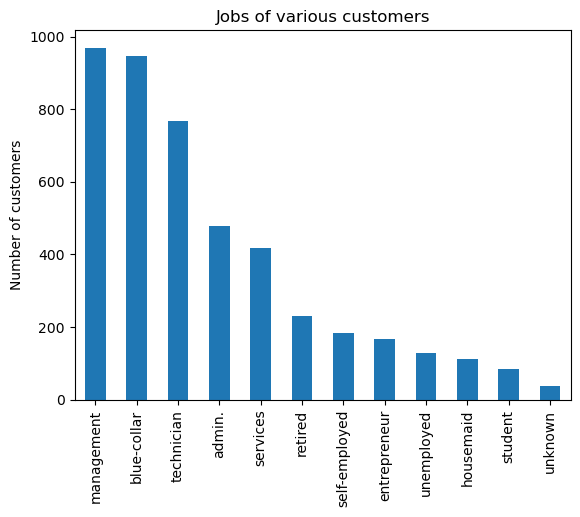

In [20]:
# Plotting the data for the job to check how the data behaves on the plot 
# for the values
fig = data['job'].value_counts().plot.bar()
fig.set_title('Jobs of various customers')
fig.set_ylabel('Number of customers')

In [21]:
# lets also check how the data would look like using the value_counts
data['job'].value_counts()

management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: job, dtype: int64

* Education field

Text(0, 0.5, 'Number of customers')

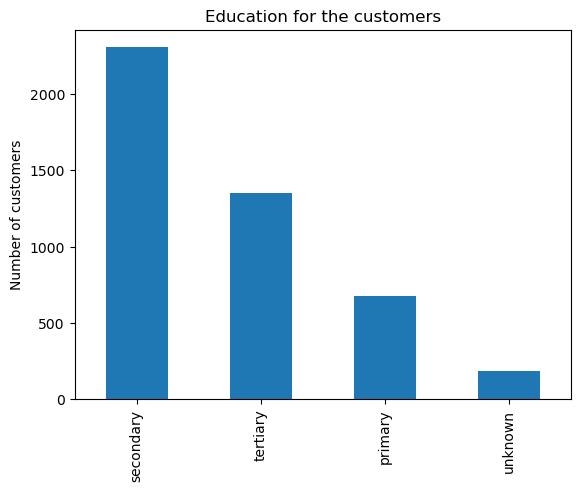

In [25]:
fig = data['education'].value_counts().plot.bar()
fig.set_title('Education for the customers')
fig.set_ylabel('Number of customers')

* To check the data types in the Pandas Dataframe use `dtypes`

In [26]:
data.dtypes

age           int64
job          object
marital      object
education    object
default       int64
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

* Using replace we shall replace unknow value with NaN (Not a Number)

In [31]:
import numpy as np

In [32]:
data.replace("unknown", np.nan, inplace=True)

* Once the unknown value is replaced with nan, we can compute which columns has null values

In [33]:
data.isnull().sum()

age             0
job            38
marital         0
education     187
default         0
balance         0
housing         0
loan            0
contact      1324
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome     3705
y               0
dtype: int64

In [34]:
# use the mean() method after isnull()
# to obtain the fraction of missing values:

data.isnull().mean()

age          0.000000
job          0.008405
marital      0.000000
education    0.041363
default      0.000000
balance      0.000000
housing      0.000000
loan         0.000000
contact      0.292856
day          0.000000
month        0.000000
duration     0.000000
campaign     0.000000
pdays        0.000000
previous     0.000000
poutcome     0.819509
y            0.000000
dtype: float64

In [35]:
# Let's do the same for the variable age:

# First, we create a binary variable to indicate
# if a value is missing.
import numpy as np
data['job_null'] = np.where(data['job'].isnull(), 1, 0)

# Let us check the distribution of job_null variable using value_counts()
data['job_null'].value_counts()

0    4483
1      38
Name: job_null, dtype: int64

* Cardinality
  - The number of values in the categorical variable is referred to as cardinality
  - If there are high number of labels, then it is referred to as high cardinality

* Outliers in data
  - salaries - 1000,1200,1300,1350,100000,2,1200,1300
    - 100000,2 are outliers
  - Outliers can also be visualized using a box or whisker plot

* Box plot or Whisker plot
whisker plot also called a box plot displays the five-number summary of dataset. The five-number summary is the minimum, first quartile, median, third quartile, and maximum

<img src='boxplot.png'/>

<Axes: xlabel='age'>

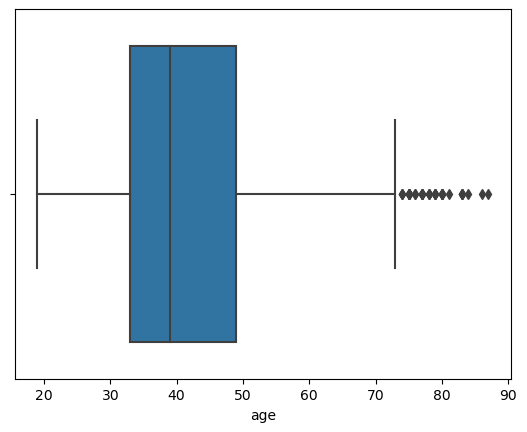

In [41]:
import seaborn as sns
sns.boxplot(x=data["age"])

<Axes: xlabel='pdays'>

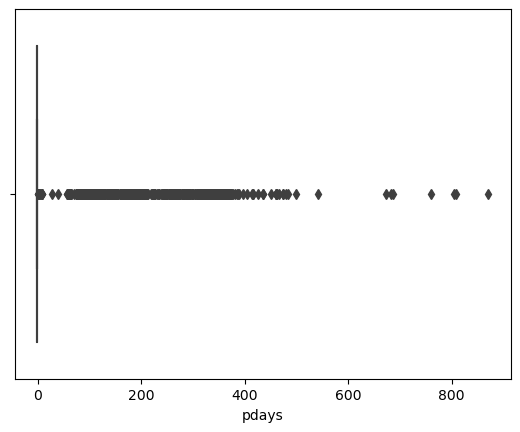

In [40]:
sns.boxplot(x=data["pdays"])

In [46]:
def draw_plots(df, variable):
    # The function takes a dataframe (df) and
    # the variable of interest as arguments.

    # Define figure size.
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('RM quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

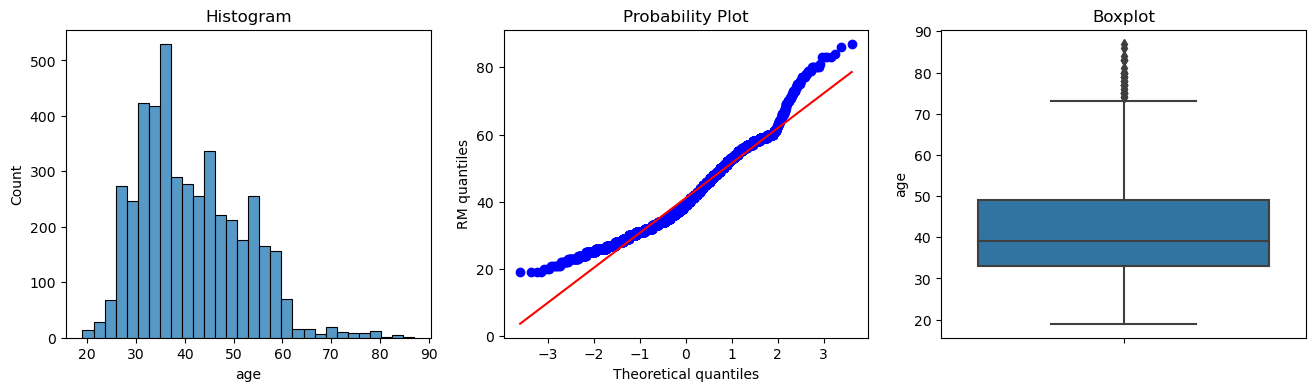

In [47]:
draw_plots(data, 'age')

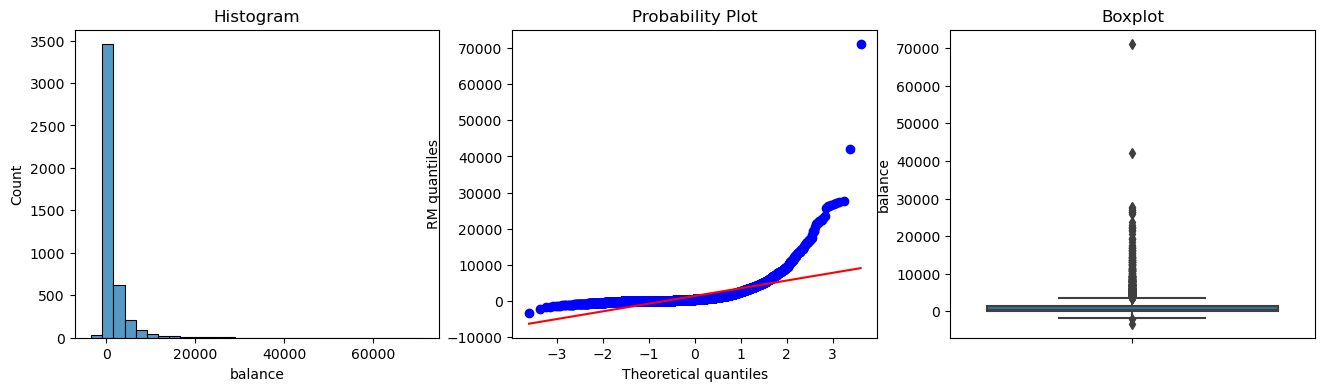

In [48]:
draw_plots(data, 'balance')

#### Find range of values

In [49]:
def find_range_values(df, variable):

    # Calculate the boundaries
    # for a Gaussian distribution.

    upper_boundary = df[variable].mean() + 3 * df[variable].std()
    lower_boundary = df[variable].mean() - 3 * df[variable].std()

    return upper_boundary, lower_boundary

In [50]:
upper_boundary, lower_boundary = find_range_values(data, 'age')
upper_boundary, lower_boundary

(72.89872798783477, 9.441462235567126)

In [51]:
upper_boundary, lower_boundary = find_range_values(data, 'balance')
upper_boundary, lower_boundary

(10451.572246468628, -7606.25660833547)